This notebook trains a 2-layer NN on k-AND problem with varying postiive/negative sample distribution in train data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import data
import train

In [3]:
input_dim=16
k=4

In [4]:
disjoint_mixed_pool = data.create_mixed_clause_pool_random_disjoint(
    global_input_dim=input_dim,
    pool_size=256,
    features_per_and=4,
    seed=8,
)

In [ ]:
# Create formula with disjoint clauses
formula = disjoint_mixed_pool[:4]
formula

[[(8, False), (10, False), (14, False), (15, False)],
 [(4, False), (9, False), (11, False), (13, False)],
 [(0, False), (1, False), (3, False), (12, False)],
 [(2, False), (5, False), (6, False), (7, False)]]

In [6]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=20000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
)
train_data, test_data = dset

In [7]:
T = 1000
agg_steps = list(range(0, T, 100))
plot_steps = list(range(100, T, 100))

In [ ]:
y = train_data.tensors[1]
y.sum() / len(y) # ~.5

tensor(0.4999)

## Vary the order of random, ~half pos half neg training data.

In [9]:
# Shared for all run
test_loader = data.create_dataloader(test_data, batch_size=64)

In [12]:
# Original set up, random labels and permutation
train_loader = data.create_dataloader(train_data, batch_size=64)

train.run_single_model(
    run_name="orig",
    max_aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

orig: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
num_batches: 312


KeyboardInterrupt: 

sort_y_inc: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
sort_y_inc: epoch=0/5, trainErr: 0.70, testErr: 0.49, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_y_inc: epoch=0/5, trainErr: 0.70, testErr: 0.49, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_

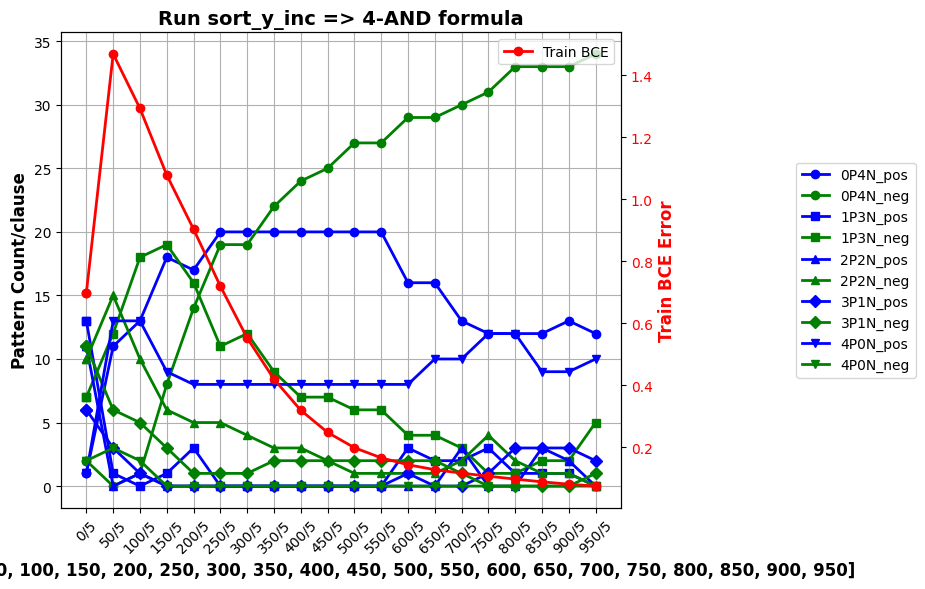

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


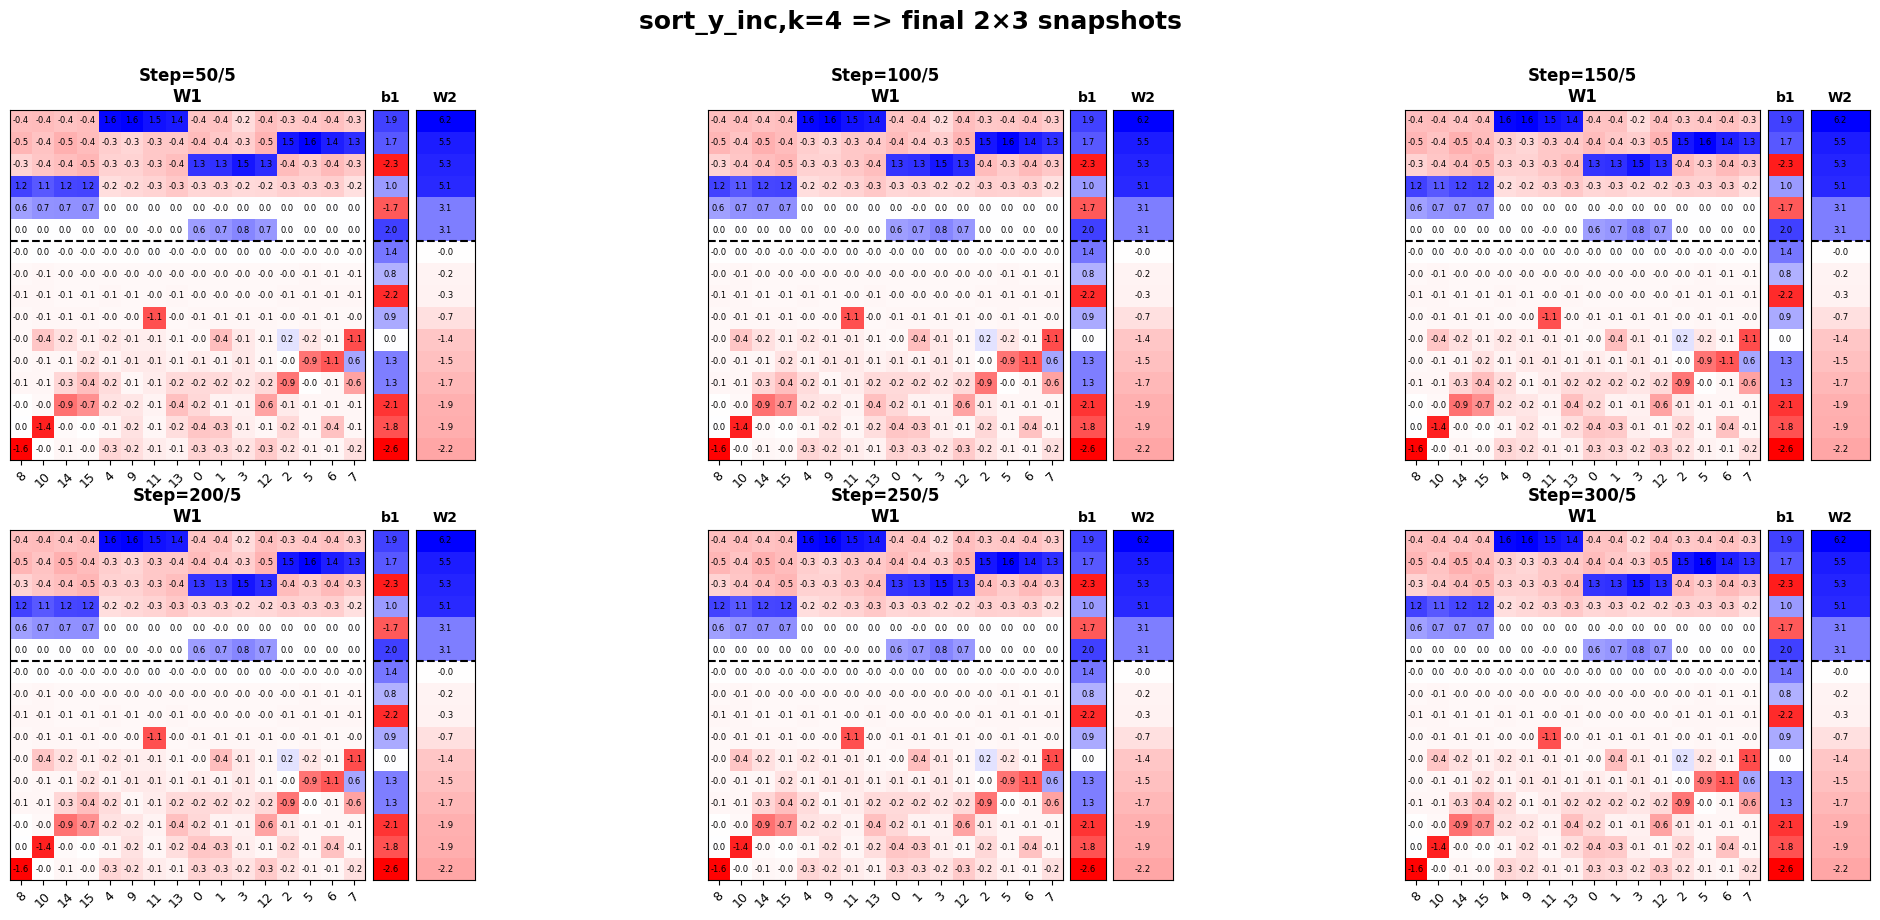

Saved => ./pdfs/sort_y_inc,k=4_final_6snap_2x3.pdf


In [11]:
train_loader_y_inc = data.create_dataloader_sort_y(train_data, batch_size=64)

train.run_single_model(
    run_name="sort_y_inc",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader_y_inc,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

In [12]:
train_loader_y_dec = data.create_dataloader_sort_y(train_data, batch_size=64, increasing=False)

train.run_single_model(
    run_name="sort_y_dec",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader_y_dec,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

sort_y_dec: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
sort_y_dec: epoch=0/5, trainErr: 0.70, testErr: 0.49, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_y_dec: epoch=0/5, trainErr: 0.70, testErr: 0.49, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_

KeyboardInterrupt: 

sort_xsum_inc: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
sort_xsum_inc: epoch=0/5, trainErr: 0.70, testErr: 0.50, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_xsum_inc: epoch=0/5, trainErr: 0.70, testErr: 0.50, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 2.00, sum_of_clauseOve

sort_xsum_inc: epoch=250/5, trainErr: 0.10, testErr: 0.03, 0P4N_pos: 13.00, 0P4N_neg: 8.00, 1P3N_pos: 0.00, 1P3N_neg: 17.00, 2P2N_pos: 0.00, 2P2N_neg: 6.00, 3P1N_pos: 0.00, 3P1N_neg: 7.00, 4P0N_pos: 11.00, 4P0N_neg: 2.00, total_kp_pos: 11.00, sum_of_clauseOverlaps_kp_pos: 5.00, overlap_kp_pos_with_prior: 11.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
sort_xsum_inc: epoch=300/5, trainErr: 0.07, testErr: 0.02, 0P4N_pos: 13.00, 0P4N_neg: 11.00, 1P3N_pos: 0.00, 1P3N_neg: 12.00, 2P2N_pos: 0.00, 2P2N_neg: 8.00, 3P1N_pos: 0.00, 3P1N_neg: 8.00, 4P0N_pos: 11.00, 4P0N_neg: 1.00, total_kp_pos: 11.00, sum_of_clauseOverlaps_kp_pos: 5.00, overlap_kp_pos_with_prior: 11.00, total_kp_neg: 1.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 1.00
sort_xsum_inc: epoch=350/5, trainErr: 0.05, testErr: 0.01, 0P4N_pos: 13.00, 0P4N_neg: 13.00, 1P3N_pos: 0.00, 1P3N_neg: 10.00, 2P2N_pos: 0.00, 2P2N_neg: 8.00, 3P1N_pos: 0.00, 3P1N_neg: 8.00, 4P0N_po

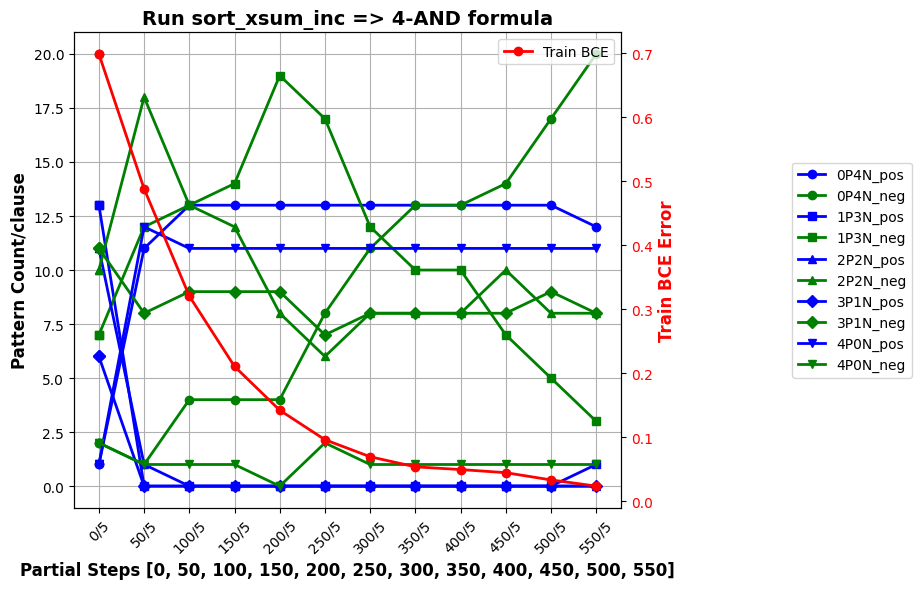

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


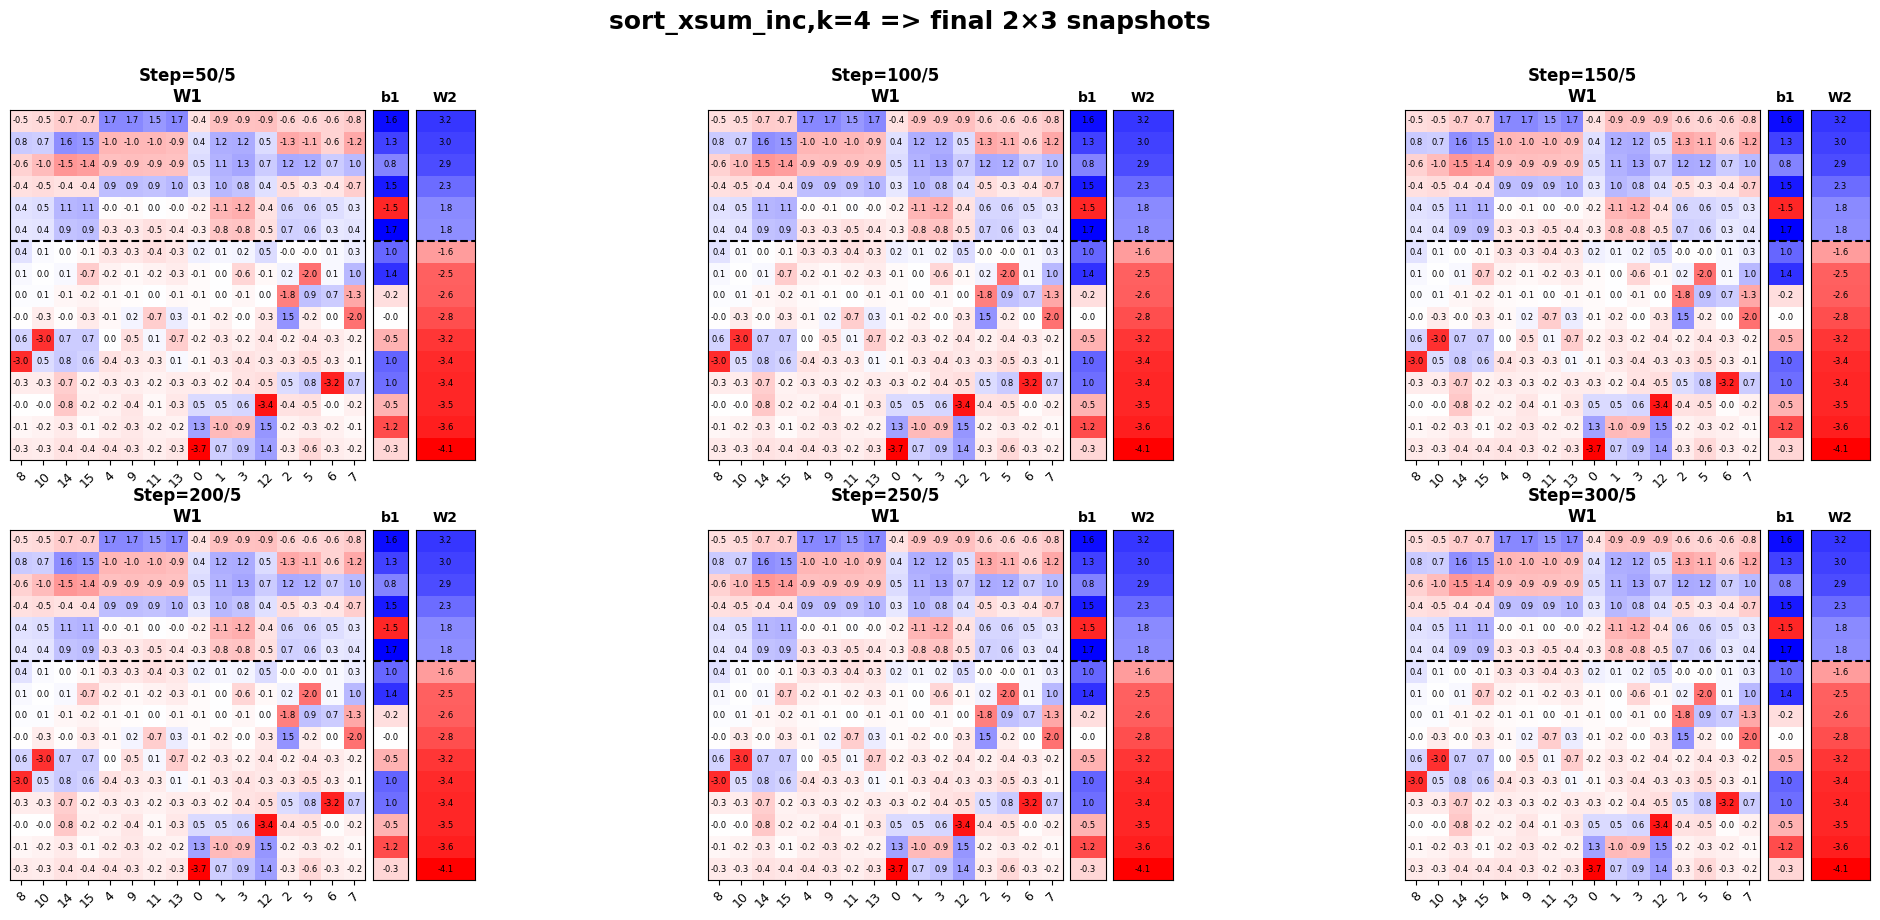

Saved => ./pdfs/sort_xsum_inc,k=4_final_6snap_2x3.pdf


In [52]:
# Sum of x (set bits in relevant x_i) increasing
train_loader_xsum_inc = data.create_dataloader_sort_sumx(train_data, batch_size=64, increasing=True)

train.run_single_model(
    run_name="sort_xsum_inc",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader_xsum_inc,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

sort_xsum_dec: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
sort_xsum_dec: epoch=0/5, trainErr: 0.70, testErr: 0.50, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 2.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_xsum_dec: epoch=0/5, trainErr: 0.70, testErr: 0.50, 0P4N_pos: 1.00, 0P4N_neg: 2.00, 1P3N_pos: 13.00, 1P3N_neg: 7.00, 2P2N_pos: 11.00, 2P2N_neg: 10.00, 3P1N_pos: 6.00, 3P1N_neg: 11.00, 4P0N_pos: 1.00, 4P0N_neg: 2.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 2.00, sum_of_clauseOve

sort_xsum_dec: epoch=50/5, trainErr: 0.57, testErr: 0.29, 0P4N_pos: 20.00, 0P4N_neg: 0.00, 1P3N_pos: 0.00, 1P3N_neg: 2.00, 2P2N_pos: 0.00, 2P2N_neg: 16.00, 3P1N_pos: 0.00, 3P1N_neg: 11.00, 4P0N_pos: 12.00, 4P0N_neg: 3.00, total_kp_pos: 12.00, sum_of_clauseOverlaps_kp_pos: 4.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 3.00, overlap_kp_neg_with_prior: 1.00
sort_xsum_dec: epoch=100/5, trainErr: 0.36, testErr: 0.17, 0P4N_pos: 19.00, 0P4N_neg: 0.00, 1P3N_pos: 1.00, 1P3N_neg: 8.00, 2P2N_pos: 0.00, 2P2N_neg: 15.00, 3P1N_pos: 1.00, 3P1N_neg: 9.00, 4P0N_pos: 11.00, 4P0N_neg: 0.00, total_kp_pos: 11.00, sum_of_clauseOverlaps_kp_pos: 3.00, overlap_kp_pos_with_prior: 11.00, total_kp_neg: 0.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
sort_xsum_dec: epoch=150/5, trainErr: 0.23, testErr: 0.08, 0P4N_pos: 19.00, 0P4N_neg: 4.00, 1P3N_pos: 1.00, 1P3N_neg: 9.00, 2P2N_pos: 1.00, 2P2N_neg: 11.00, 3P1N_pos: 0.00, 3P1N_neg: 8.00, 4P0N_pos: 

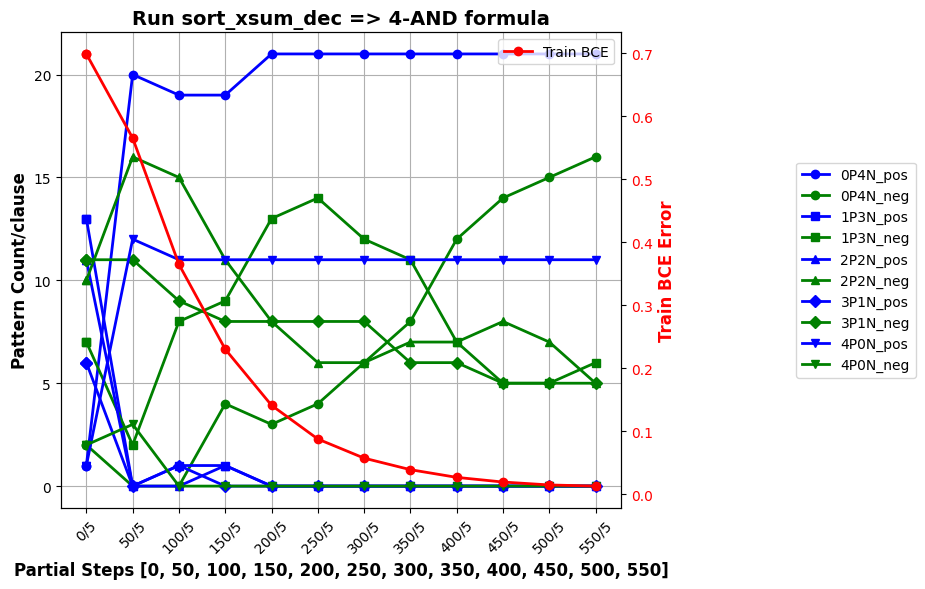

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


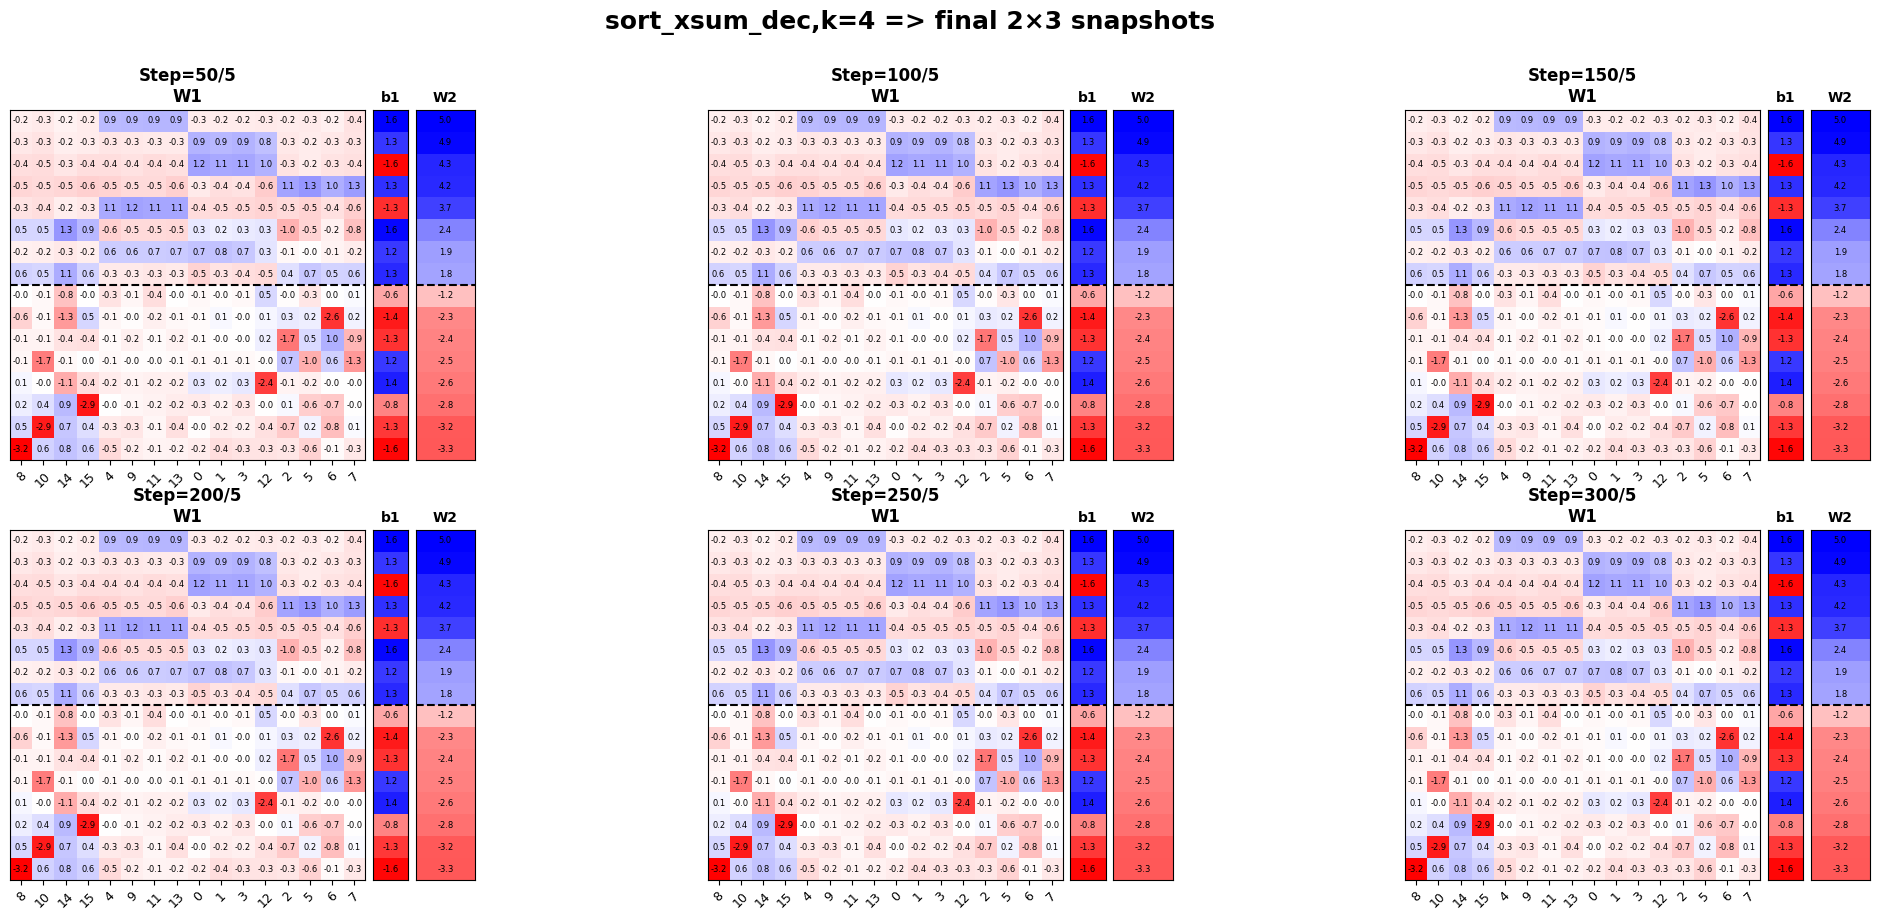

Saved => ./pdfs/sort_xsum_dec,k=4_final_6snap_2x3.pdf


In [53]:
# Sum of x (set bits in relevant x_i) decreasing
train_loader_xsum_dec = data.create_dataloader_sort_sumx(train_data, batch_size=64, increasing=False)

train.run_single_model(
    run_name="sort_xsum_dec",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader_xsum_dec,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

## Vary the proportion of positive and negative samples.

p=.1

p=.1: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
p=.1: epoch=0/5, trainErr: 0.72, testErr: 0.56, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
p=.1: epoch=0/5, trainErr: 0.72, testErr: 0.56, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_k

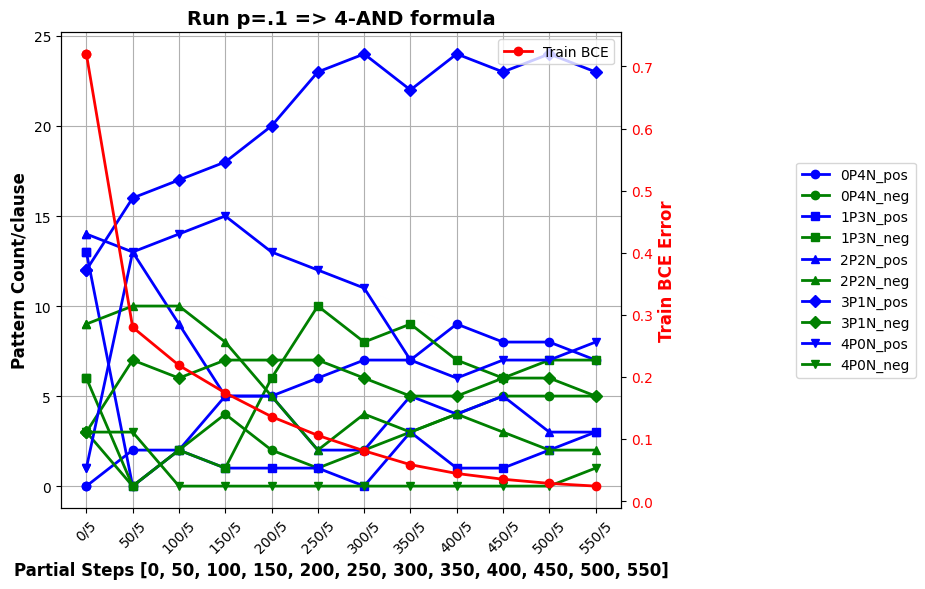

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


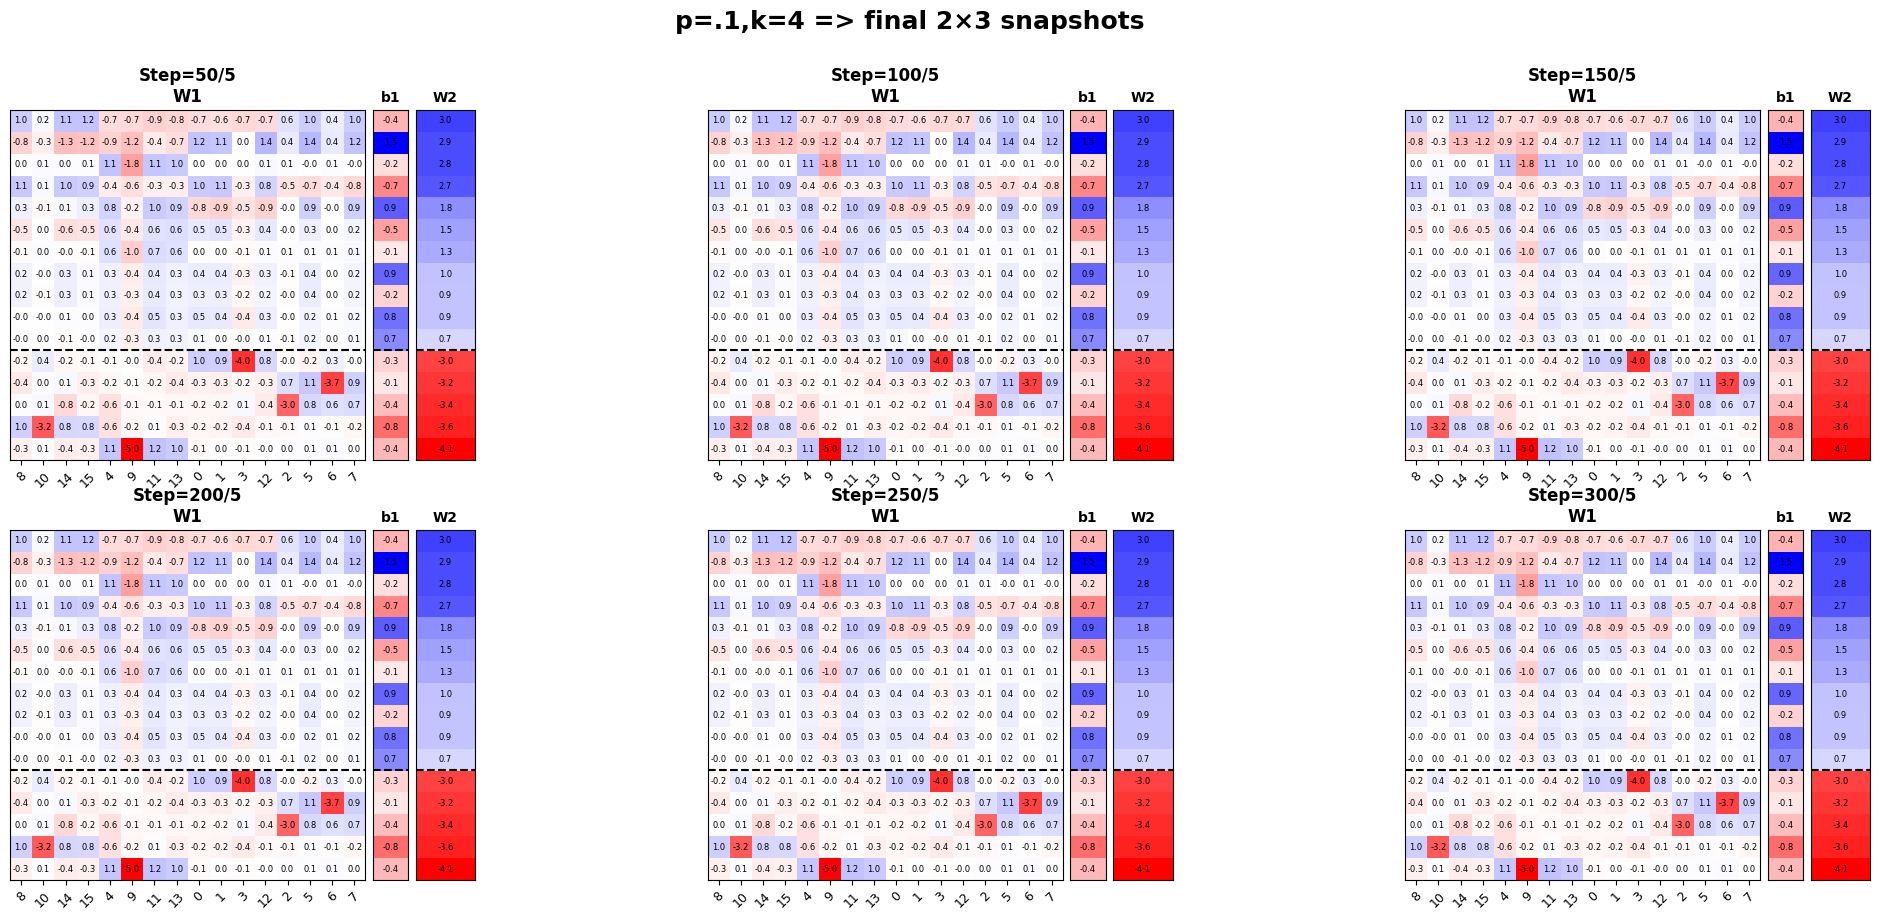

Saved => ./pdfs/p=.1,k=4_final_6snap_2x3.pdf


In [54]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
    pos_neg_ratio=.1,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_name="p=.1",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

p=.25

p=.25: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
p=.25: epoch=0/5, trainErr: 0.71, testErr: 0.58, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
p=.25: epoch=0/5, trainErr: 0.71, testErr: 0.58, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overla

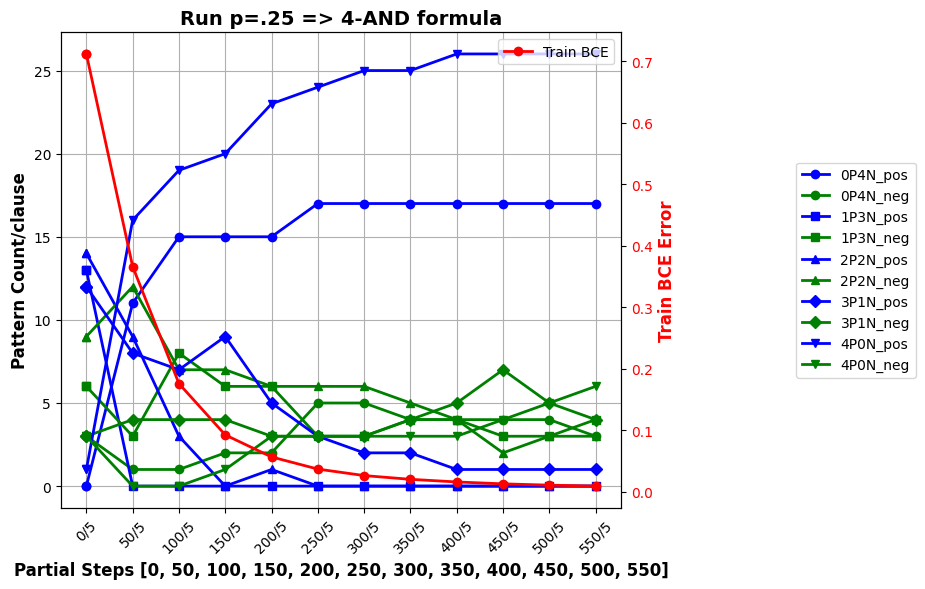

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


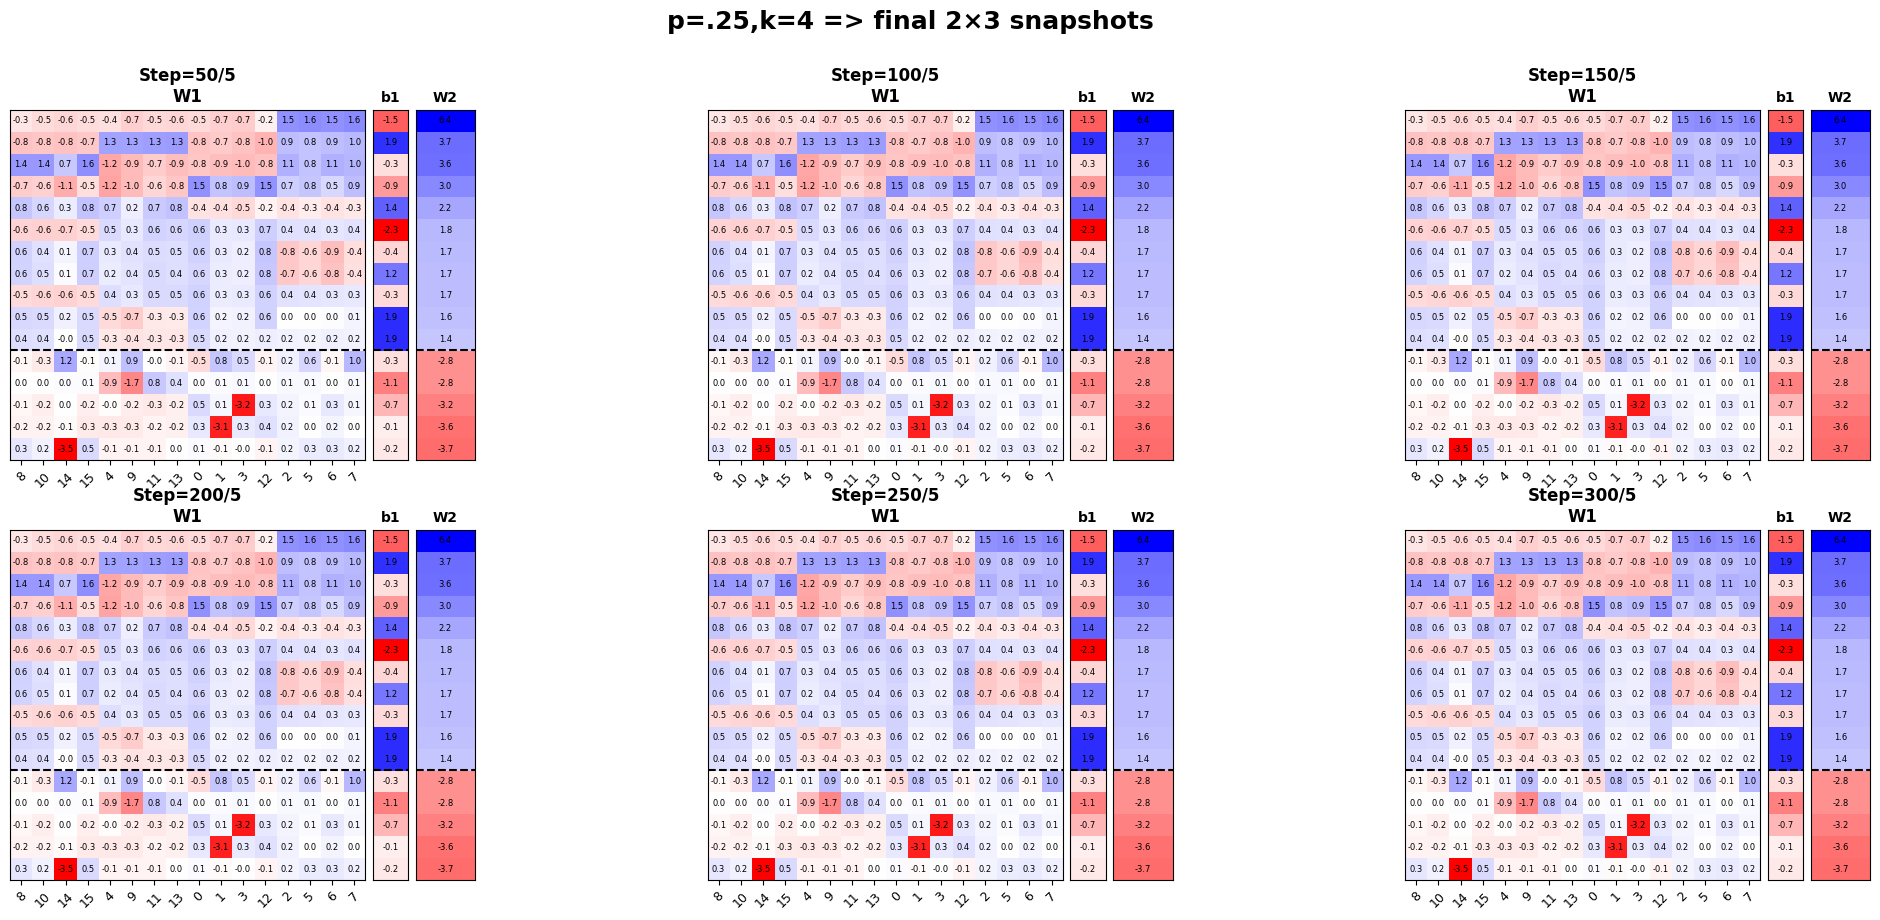

Saved => ./pdfs/p=.25,k=4_final_6snap_2x3.pdf


In [55]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
    pos_neg_ratio=.25,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_name="p=.25",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

p=.5

p=.5: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
p=.5: epoch=0/5, trainErr: 0.70, testErr: 0.55, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
p=.5: epoch=0/5, trainErr: 0.70, testErr: 0.56, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_k

p=.5: epoch=150/5, trainErr: 0.05, testErr: 0.01, 0P4N_pos: 18.00, 0P4N_neg: 3.00, 1P3N_pos: 0.00, 1P3N_neg: 9.00, 2P2N_pos: 0.00, 2P2N_neg: 11.00, 3P1N_pos: 0.00, 3P1N_neg: 6.00, 4P0N_pos: 14.00, 4P0N_neg: 3.00, total_kp_pos: 14.00, sum_of_clauseOverlaps_kp_pos: 8.00, overlap_kp_pos_with_prior: 13.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 2.00
p=.5: epoch=200/5, trainErr: 0.02, testErr: 0.00, 0P4N_pos: 18.00, 0P4N_neg: 3.00, 1P3N_pos: 0.00, 1P3N_neg: 8.00, 2P2N_pos: 0.00, 2P2N_neg: 10.00, 3P1N_pos: 0.00, 3P1N_neg: 8.00, 4P0N_pos: 14.00, 4P0N_neg: 3.00, total_kp_pos: 14.00, sum_of_clauseOverlaps_kp_pos: 8.00, overlap_kp_pos_with_prior: 14.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 3.00
p=.5: epoch=250/5, trainErr: 0.01, testErr: 0.00, 0P4N_pos: 18.00, 0P4N_neg: 3.00, 1P3N_pos: 0.00, 1P3N_neg: 9.00, 2P2N_pos: 0.00, 2P2N_neg: 7.00, 3P1N_pos: 0.00, 3P1N_neg: 11.00, 4P0N_pos: 14.00, 4P0N_neg: 2.00, tot

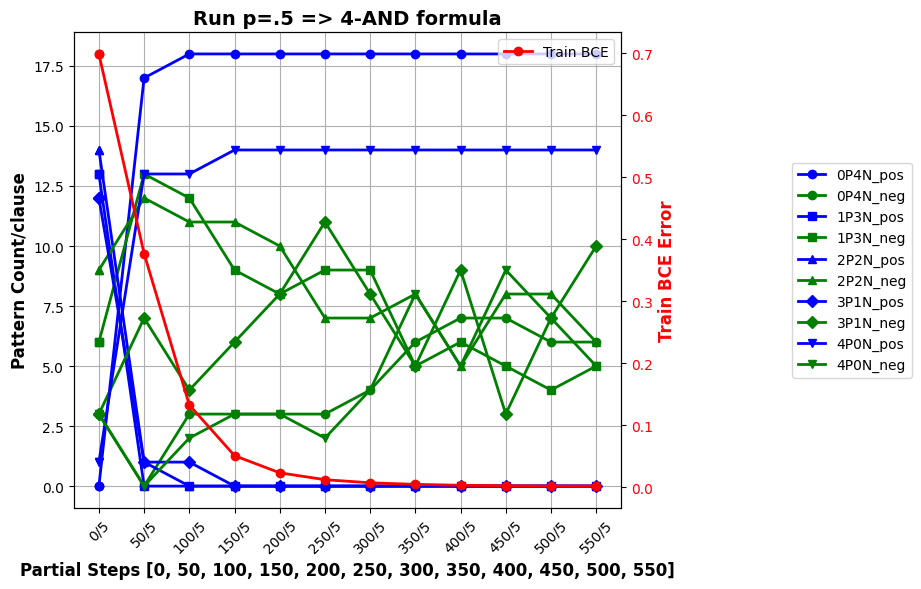

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


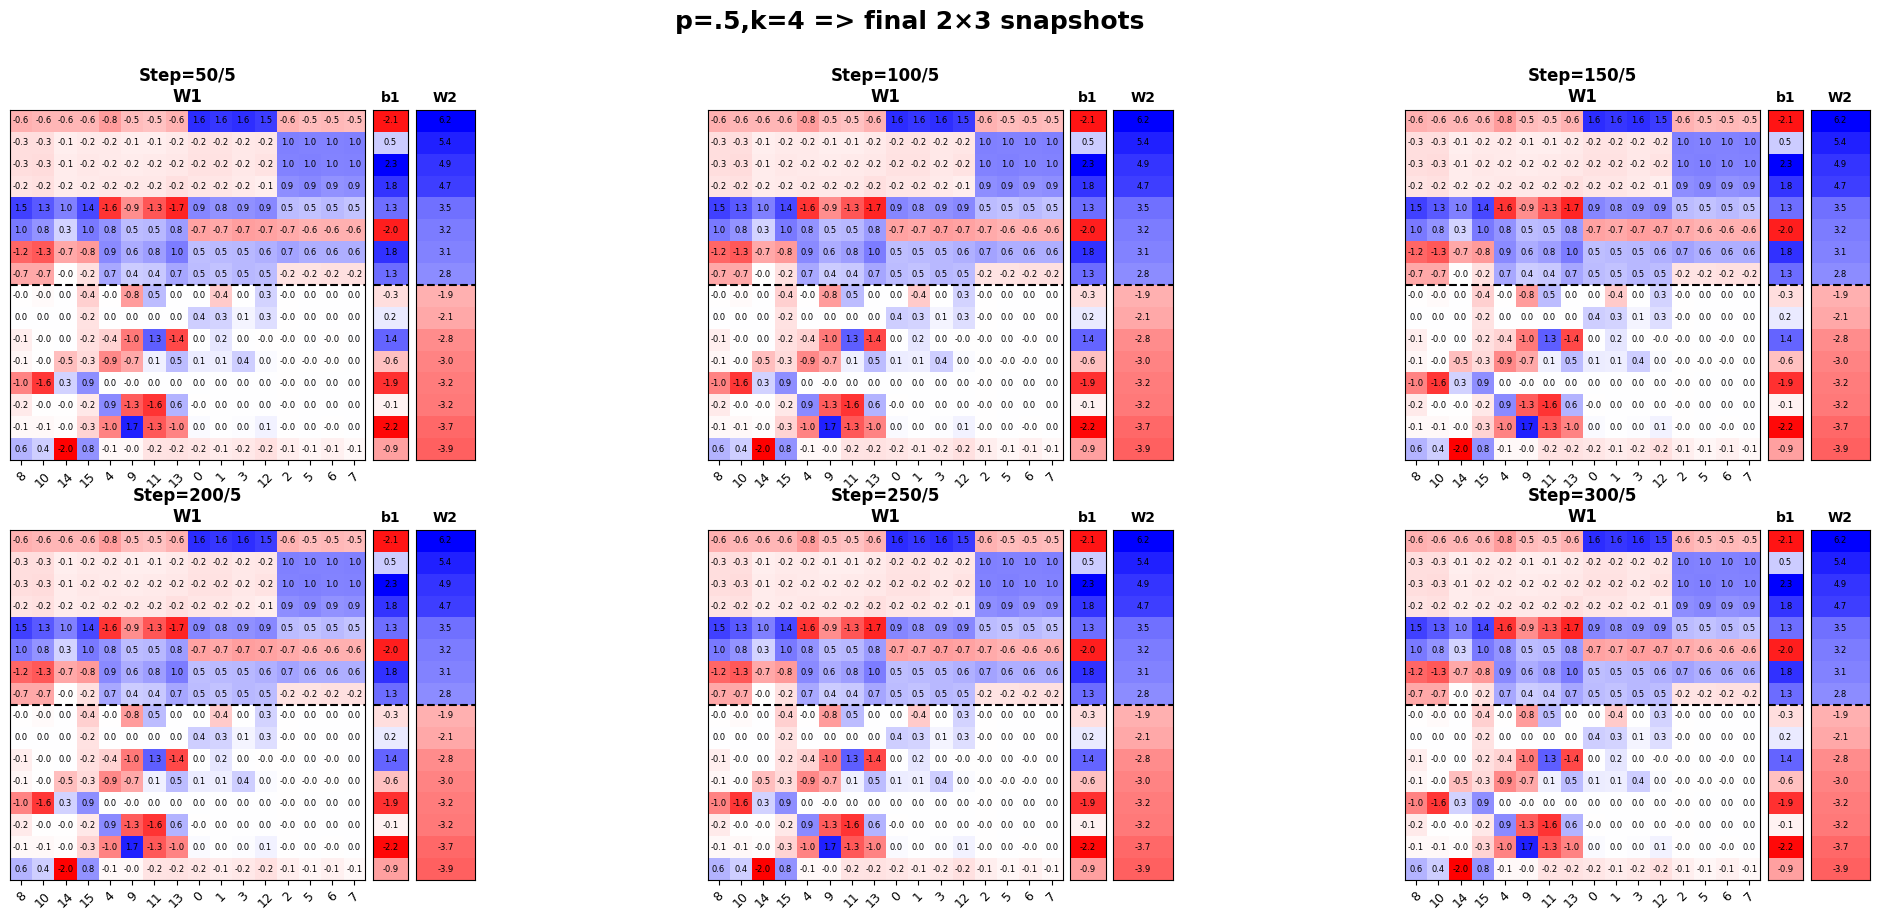

Saved => ./pdfs/p=.5,k=4_final_6snap_2x3.pdf


In [56]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
    pos_neg_ratio=.5,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_name="p=.5",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

p=.75

p=.75: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
p=.75: epoch=0/5, trainErr: 0.69, testErr: 0.55, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
p=.75: epoch=0/5, trainErr: 0.69, testErr: 0.55, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overla

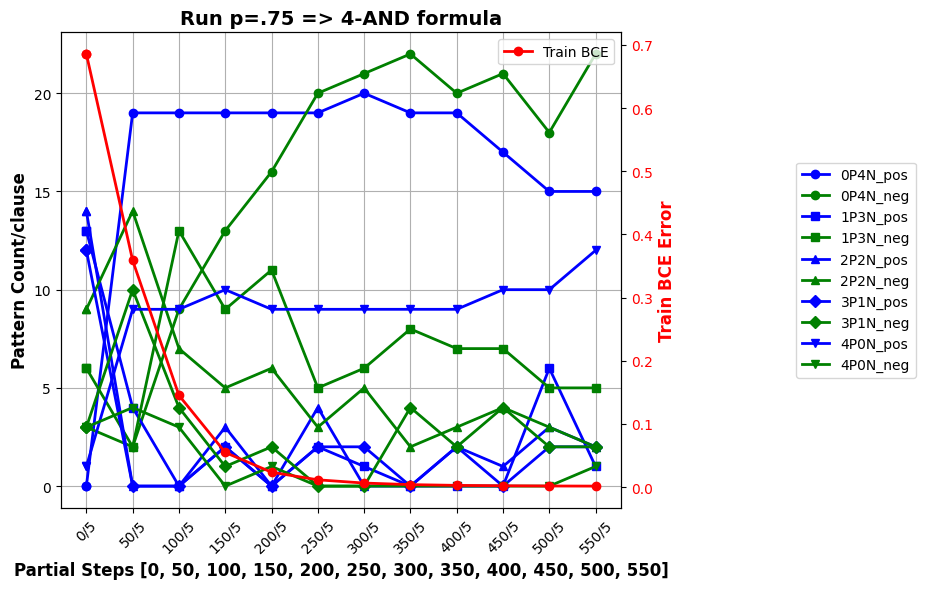

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


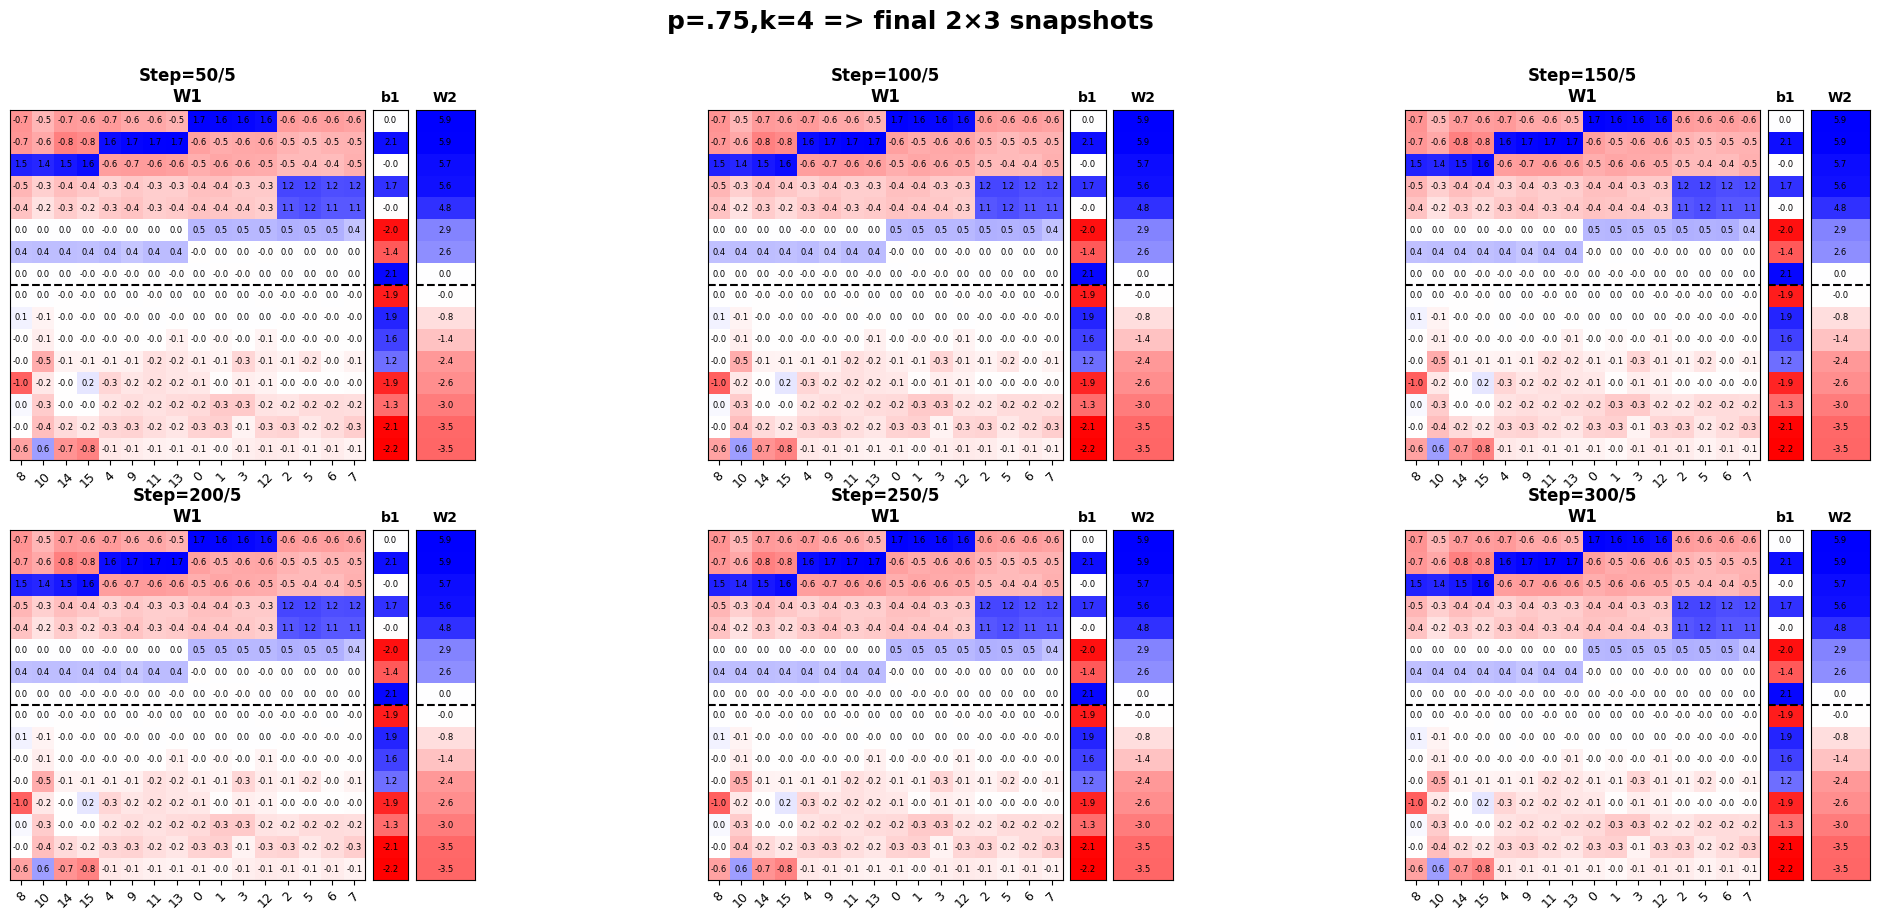

Saved => ./pdfs/p=.75,k=4_final_6snap_2x3.pdf


In [57]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
    pos_neg_ratio=.75,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_name="p=.75",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

p=.9

p=.9: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
p=.9: epoch=0/5, trainErr: 0.68, testErr: 0.56, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
p=.9: epoch=0/5, trainErr: 0.68, testErr: 0.56, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_k

p=.9: epoch=250/5, trainErr: 0.02, testErr: 0.00, 0P4N_pos: 18.00, 0P4N_neg: 23.00, 1P3N_pos: 0.00, 1P3N_neg: 8.00, 2P2N_pos: 0.00, 2P2N_neg: 6.00, 3P1N_pos: 0.00, 3P1N_neg: 3.00, 4P0N_pos: 6.00, 4P0N_neg: 0.00, total_kp_pos: 6.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 6.00, total_kp_neg: 0.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
p=.9: epoch=300/5, trainErr: 0.01, testErr: 0.00, 0P4N_pos: 18.00, 0P4N_neg: 24.00, 1P3N_pos: 0.00, 1P3N_neg: 4.00, 2P2N_pos: 0.00, 2P2N_neg: 8.00, 3P1N_pos: 0.00, 3P1N_neg: 3.00, 4P0N_pos: 6.00, 4P0N_neg: 1.00, total_kp_pos: 6.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 6.00, total_kp_neg: 1.00, sum_of_clauseOverlaps_kp_neg: 0.00, overlap_kp_neg_with_prior: 0.00
p=.9: epoch=350/5, trainErr: 0.01, testErr: 0.00, 0P4N_pos: 18.00, 0P4N_neg: 27.00, 1P3N_pos: 2.00, 1P3N_neg: 4.00, 2P2N_pos: 1.00, 2P2N_neg: 3.00, 3P1N_pos: 1.00, 3P1N_neg: 2.00, 4P0N_pos: 6.00, 4P0N_neg: 0.00, total_kp_p

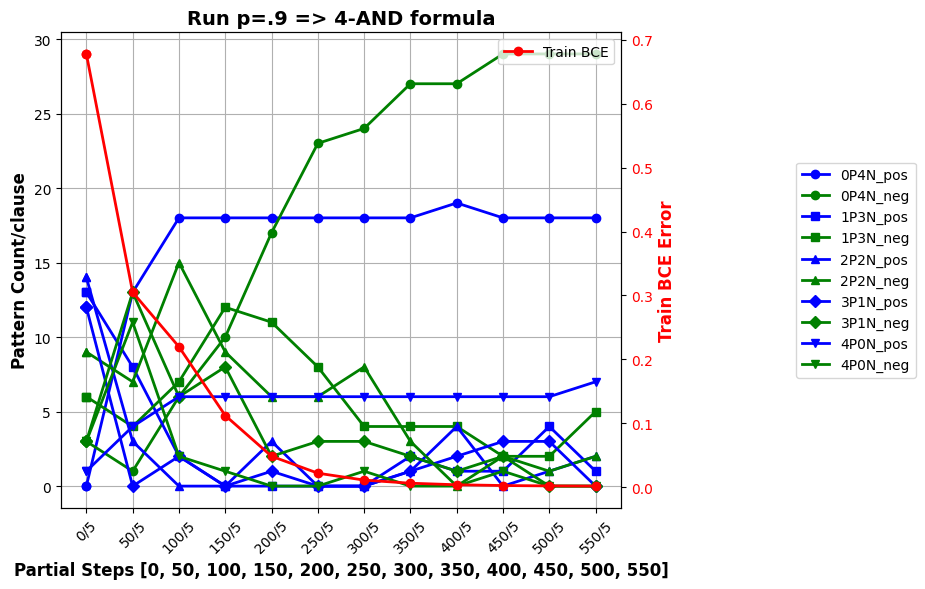

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


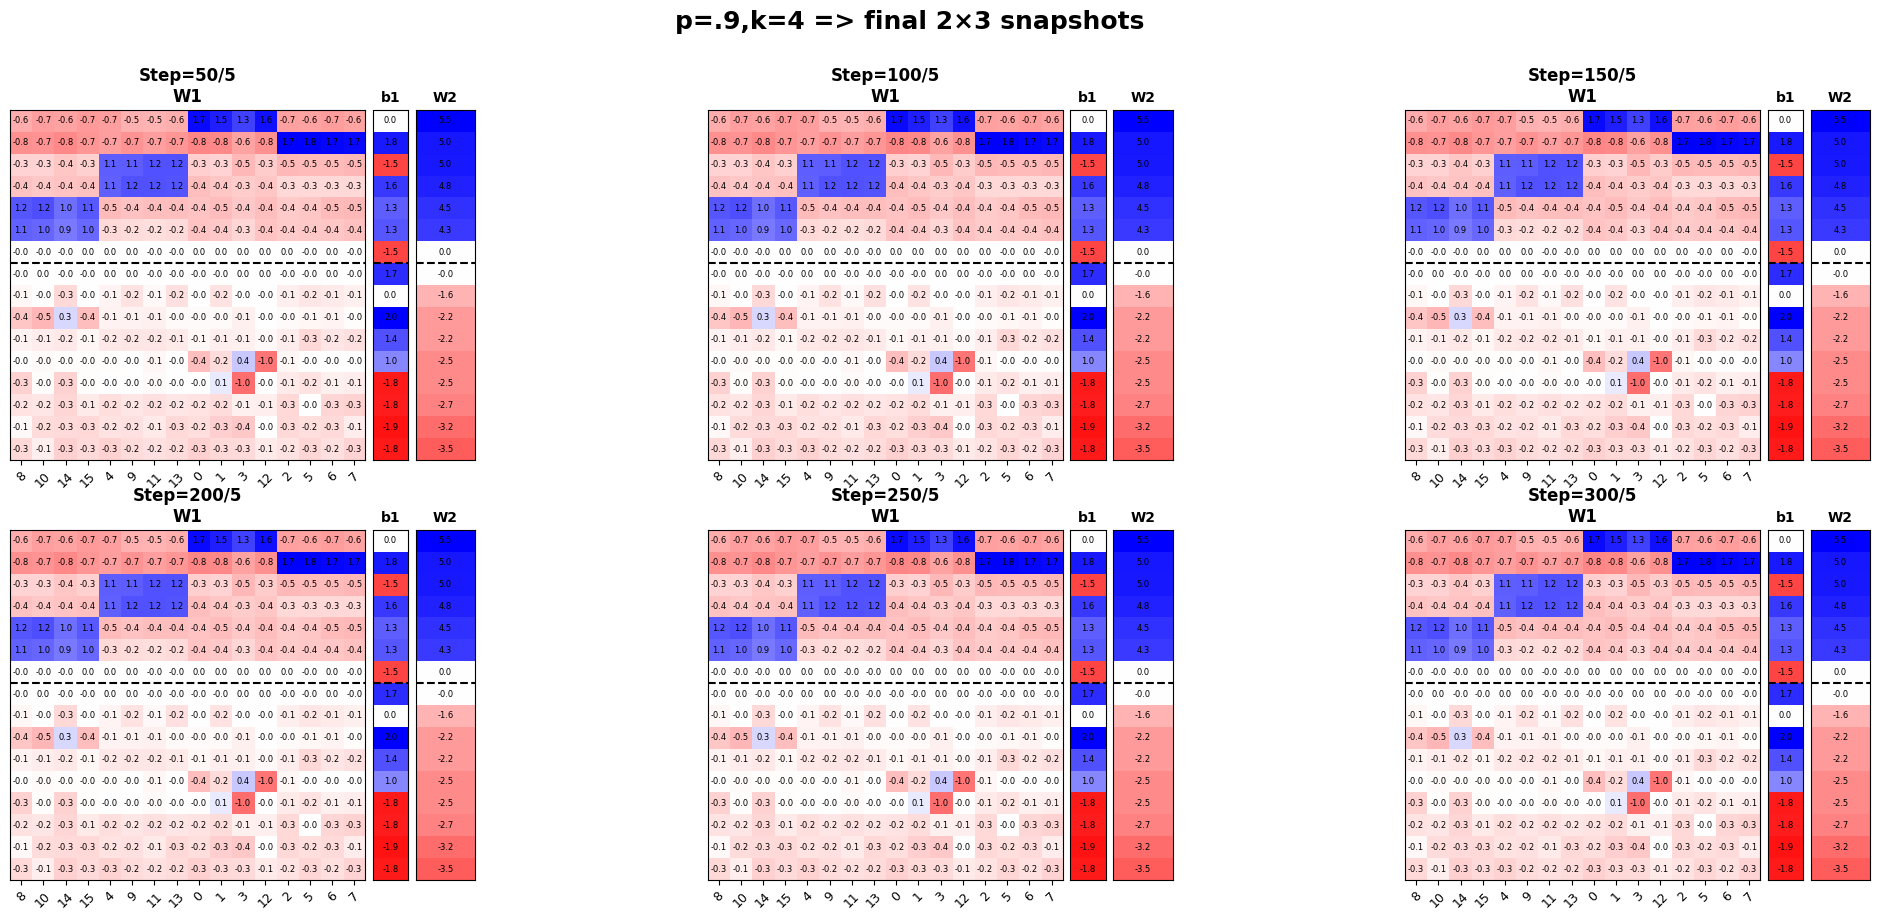

Saved => ./pdfs/p=.9,k=4_final_6snap_2x3.pdf


In [58]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
    pos_neg_ratio=.9,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_name="p=.9",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)

p=.9: using new random 4-AND formula => [[(8, False), (10, False), (14, False), (15, False)], [(4, False), (9, False), (11, False), (13, False)], [(0, False), (1, False), (3, False), (12, False)], [(2, False), (5, False), (6, False), (7, False)]]
p=.9: epoch=0/5, trainErr: 0.67, testErr: 0.55, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_kp_neg_with_prior: 0.00
p=.9: epoch=0/5, trainErr: 0.67, testErr: 0.55, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 13.00, 1P3N_neg: 6.00, 2P2N_pos: 14.00, 2P2N_neg: 9.00, 3P1N_pos: 12.00, 3P1N_neg: 3.00, 4P0N_pos: 1.00, 4P0N_neg: 3.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 1.00, total_kp_neg: 3.00, sum_of_clauseOverlaps_kp_neg: 1.00, overlap_k

p=.9: epoch=150/5, trainErr: 0.00, testErr: 0.50, 0P4N_pos: 2.00, 0P4N_neg: 1.00, 1P3N_pos: 5.00, 1P3N_neg: 4.00, 2P2N_pos: 9.00, 2P2N_neg: 2.00, 3P1N_pos: 5.00, 3P1N_neg: 5.00, 4P0N_pos: 3.00, 4P0N_neg: 28.00, total_kp_pos: 3.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 28.00, sum_of_clauseOverlaps_kp_neg: 39.00, overlap_kp_neg_with_prior: 25.00
p=.9: epoch=200/5, trainErr: 0.00, testErr: 0.50, 0P4N_pos: 1.00, 0P4N_neg: 3.00, 1P3N_pos: 6.00, 1P3N_neg: 4.00, 2P2N_pos: 2.00, 2P2N_neg: 6.00, 3P1N_pos: 6.00, 3P1N_neg: 15.00, 4P0N_pos: 1.00, 4P0N_neg: 20.00, total_kp_pos: 1.00, sum_of_clauseOverlaps_kp_pos: 0.00, overlap_kp_pos_with_prior: 0.00, total_kp_neg: 20.00, sum_of_clauseOverlaps_kp_neg: 18.00, overlap_kp_neg_with_prior: 17.00
p=.9: epoch=250/5, trainErr: 0.00, testErr: 0.50, 0P4N_pos: 0.00, 0P4N_neg: 3.00, 1P3N_pos: 3.00, 1P3N_neg: 15.00, 2P2N_pos: 3.00, 2P2N_neg: 16.00, 3P1N_pos: 2.00, 3P1N_neg: 11.00, 4P0N_pos: 0.00, 4P0N_neg: 11.00, tot

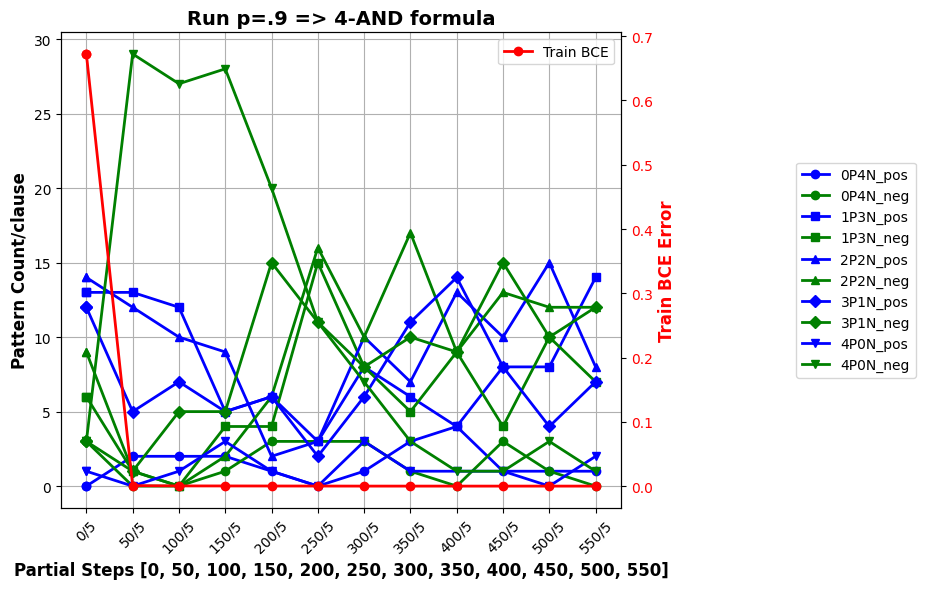

/home1/czhang/Neural-Computation/stats.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.93])


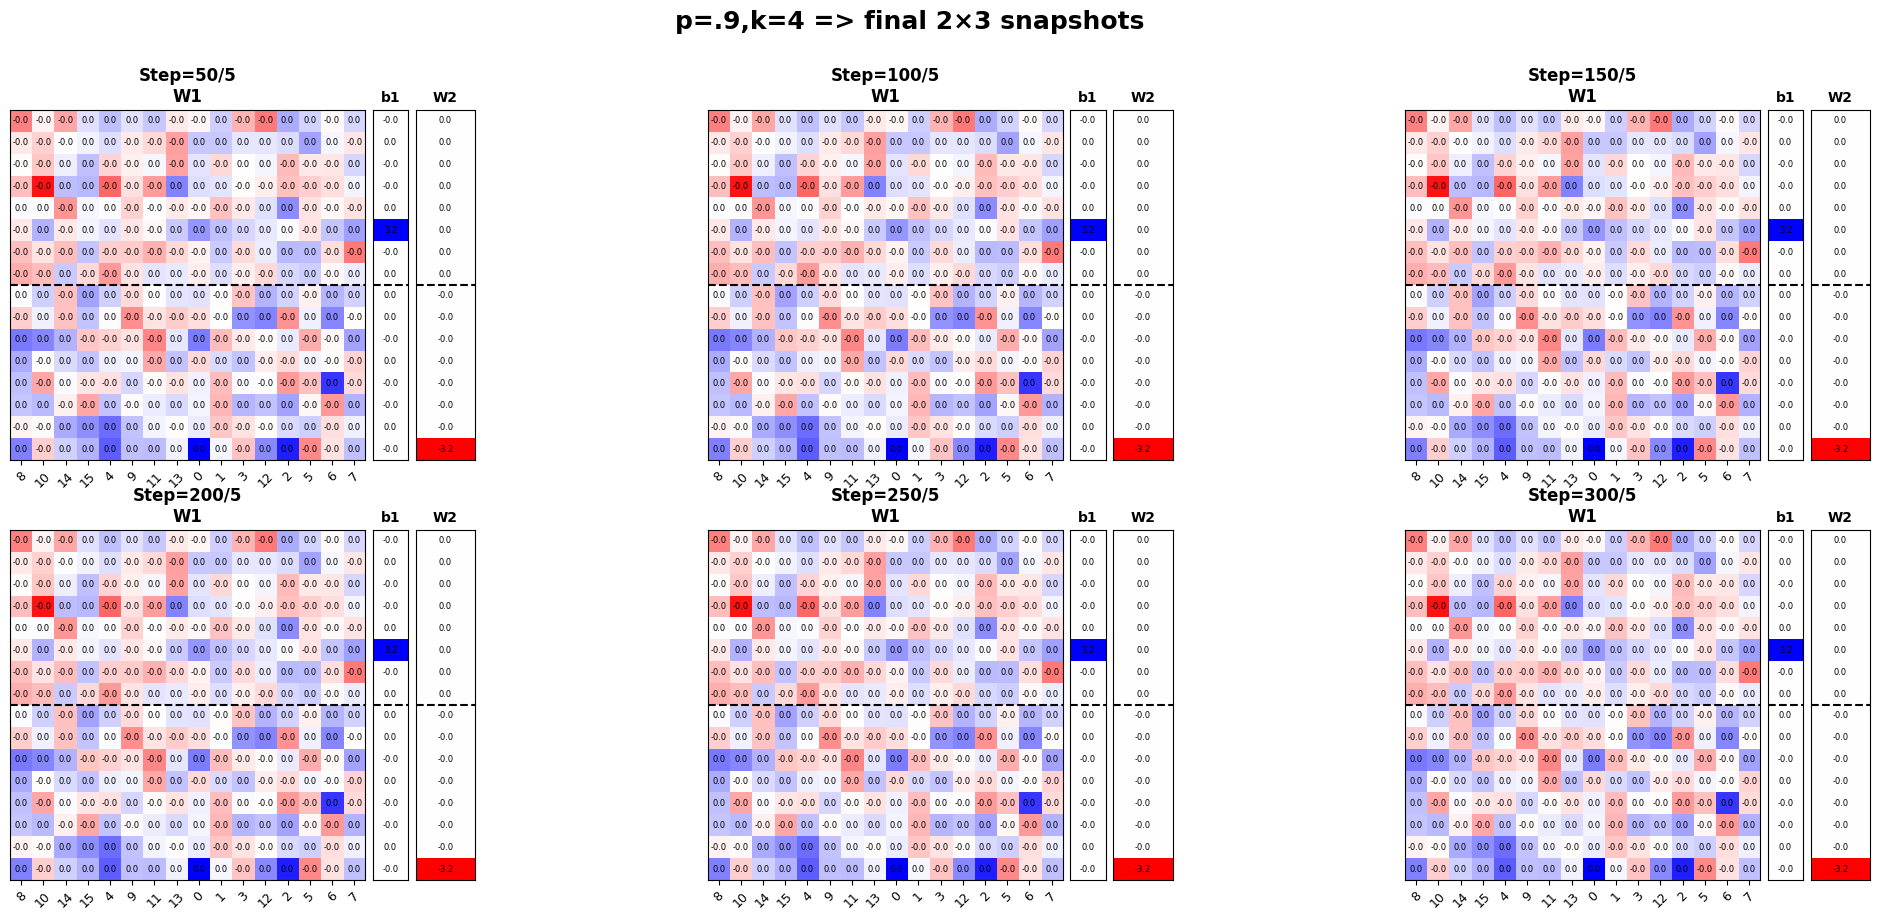

Saved => ./pdfs/p=.9,k=4_final_6snap_2x3.pdf


In [59]:
dset = data.create_dataset(
    cset=formula,
    input_dim=input_dim,
    train_size=10000,
    test_size=2000,
    min_true_vars=4,
    max_true_vars=8,
    batch_size=64,
    pos_neg_ratio=1,
)
train_data, test_data = dset

train_loader = data.create_dataloader(train_data, batch_size=64)
test_loader = data.create_dataloader(test_data, batch_size=64)

train.run_single_model(
    run_name="p=.9",
    aggregator_steps=agg_steps,
    plot_steps=plot_steps,
    input_dim=input_dim,
    hidden_dim=input_dim,
    num_features_per_clause=k,
    train_loader=train_loader,
    test_loader=test_loader,
    base_dir=".",
    l2_reg_factor=0,
    l1_reg_factor=1e-4,
    seed_offset=0,
    cset=formula
)